In [1]:
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_training, execute_ai_model
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging
from mtdnetwork.statistic.security_metric_evaluations import visualize_metric_ratio

logging.basicConfig(format='%(message)s', level=logging.INFO)

In [2]:
create_experiment_snapshots([25, 50, 75, 100])
evaluations = []

In [3]:
# Learning Parameters
epsilon = 1.0  # exploration rate
attacker_sensitivity = 1.0
# Simulator Settings
start_time = 0
finish_time = 3000
mtd_interval = 100
scheme = 'mtd_ai'
total_nodes = 300
new_network = True

# Batch settings
num_iterations = 10

In [4]:
# evaluation = execute_ai_model(start_time=start_time, finish_time=finish_time, mtd_interval=mtd_interval, scheme=scheme, total_nodes=total_nodes, new_network=new_network)

In [5]:
for i in range(num_iterations):
    evaluation = execute_ai_model(start_time=start_time, finish_time=finish_time, mtd_interval=mtd_interval, scheme=scheme, total_nodes=total_nodes, new_network=new_network)
    evaluations.append(evaluation._security_metric_record)

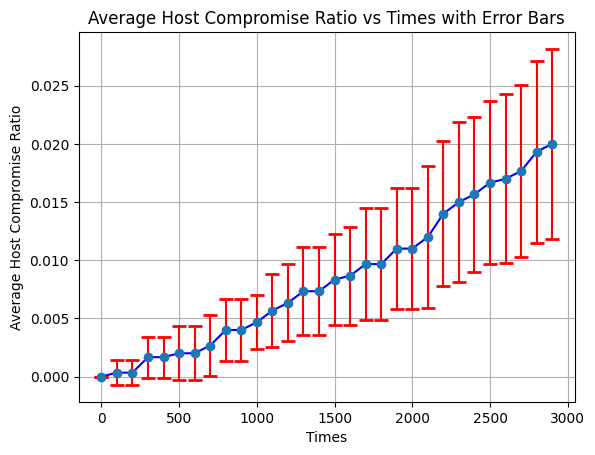

In [6]:
visualize_metric_ratio(evaluations, 'host_compromise_ratio')

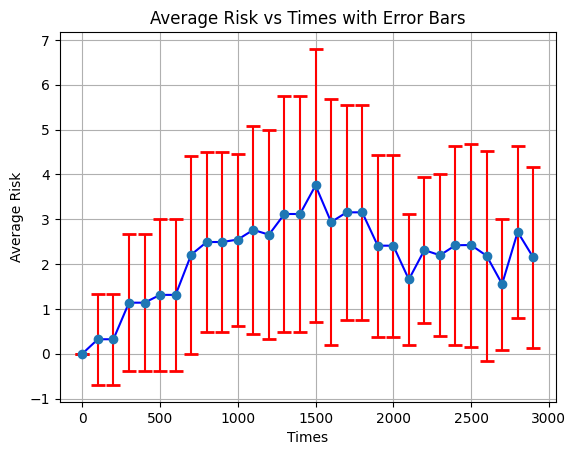

In [7]:
visualize_metric_ratio(evaluations, 'risk')

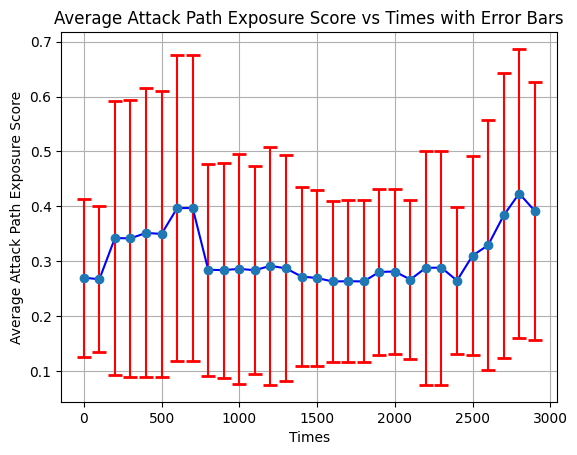

In [8]:
visualize_metric_ratio(evaluations, 'attack_path_exposure_score')

In [9]:
# evaluation._security_metric_record

In [10]:
# evaluation.visualize_host_compromise_ratio()

In [11]:
# evaluation.visualize_attack_path_exposure_score()

In [12]:
# evaluation.visualize_risk()